In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline


In [187]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
%pylab inline
%matplotlib inline
matplotlib.style.use('fivethirtyeight')


Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['histogram']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Data Schema Analysis

In [5]:
cat_outcome_df = pd.read_csv("aac_shelter_cat_outcome_eng.csv", low_memory=False)

with pd.option_context('display.max_columns', 30):
    cat_outcome_df

cat_outcome_df.describe()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,count,sex,Spay/Neuter,...,dob_year,dob_month,dob_monthyear,outcome_month,outcome_year,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,2 weeks,A684346,Cat,domestic shorthair,orange,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male,1,Male,No,...,2014,7,2014-07,7,2014,Tuesday,16,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
1,1 month,A685067,Cat,domestic shorthair,blue /white,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,Adoption,Intact Female,1,Female,No,...,2014,6,2014-08,8,2014,Thursday,18,domestic shorthair,NaN,False,True,tabby,blue,white,blue
2,3 months,A678580,Cat,domestic shorthair,white/black,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,Adoption,Spayed Female,1,Female,Yes,...,2014,3,2014-06,6,2014,Sunday,17,domestic shorthair,NaN,False,True,NaN,white,black,white
3,1 year,A675405,Cat,domestic mediumhair,black/white,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,Return to Owner,Spayed Female,1,Female,Yes,...,2013,3,2014-03,3,2014,Friday,14,domestic mediumhair,NaN,False,True,NaN,black,white,black
4,3 weeks,A670420,Cat,domestic shorthair,black/white,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,Transfer,Intact Male,1,Male,No,...,2013,12,2014-01,1,2014,Thursday,19,domestic shorthair,NaN,False,True,NaN,black,white,black
5,2 months,A684460,Cat,domestic shorthair,brown,2014-06-02 00:00:00,2014-08-13 15:04:00,2014-08-13T15:04:00,Elsa,NaN,Adoption,Spayed Female,1,Female,Yes,...,2014,6,2014-08,8,2014,Wednesday,15,domestic shorthair,NaN,False,True,tabby,brown,NaN,brown
6,8 months,A673952,Cat,domestic shorthair,brown /white,2013-07-05 00:00:00,2014-03-06 14:29:00,2014-03-06T14:29:00,NaN,SCRP,Transfer,Unknown,1,Female,Yes,...,2013,7,2014-03,3,2014,Thursday,14,domestic shorthair,NaN,False,True,tabby,brown,white,brown
7,5 months,A686497,Cat,domestic shorthair,black,2014-03-22 00:00:00,2014-08-31 15:45:00,2014-08-31T15:45:00,Chester,NaN,Adoption,Neutered Male,1,Male,Yes,...,2014,3,2014-08,8,2014,Sunday,15,domestic shorthair,NaN,False,True,tabby,black,NaN,black
8,2 months,A687965,Cat,domestic shorthair,orange,2014-08-03 00:00:00,2014-10-31 18:29:00,2014-10-31T18:29:00,*Oliver,Foster,Adoption,Neutered Male,1,Male,Yes,...,2014,8,2014-10,10,2014,Friday,18,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
9,1 year,A668547,Cat,domestic mediumhair,black/white,2012-12-04 00:00:00,2013-12-16 13:59:00,2013-12-16T13:59:00,*Preston,Partner,Transfer,Neutered Male,1,Male,Yes,...,2012,12,2013-12,12,2013,Monday,13,domestic mediumhair,NaN,False,True,NaN,black,white,black


,count,Periods,Period Range,outcome_age_(days),outcome_age_(years),dob_year,dob_month,outcome_month,outcome_year,outcome_hour
count,29421.0,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000
mean,1.0,3.199347,143.199823,509.446280,1.395743,2013.982428,6.190034,7.149893,2015.361986,14.005778
std,0.0,2.601324,162.915312,966.810609,2.648796,2.965574,2.821765,3.136380,1.243294,3.863269
min,1.0,0.000000,1.000000,0.000000,0.000000,1992.000000,1.000000,1.000000,2013.000000,0.000000
25%,1.0,2.000000,30.000000,60.000000,0.164384,2013.000000,4.000000,5.000000,2014.000000,12.000000
50%,1.0,2.000000,30.000000,90.000000,0.246575,2015.000000,6.000000,7.000000,2015.000000,14.000000
75%,1.0,4.000000,365.000000,365.000000,1.000000,2016.000000,8.000000,10.000000,2016.000000,17.000000
max,1.0,22.000000,365.000000,8030.000000,22.000000,2017.000000,12.000000,12.000000,2018.000000,23.000000


In [ ]:
### drop n/a values

In [219]:
cat_outcome_df = cat_outcome_df.dropna(subset=['outcome_type', 'color'])

In [42]:
### Find all outcome types

In [97]:
count_of_outcomes = dict(cat_outcome_df['outcome_type'].value_counts())

In [143]:
cat_outcome_df['color'].value_counts().rename_axis('unique_values').to_frame('counts')

,counts
unique_values,
brown,4462
black,4128
black/white,2804
brown /white,2338
blue,2251
orange,2229
orange /white,1095
blue/white,792
blue /white,552


In [44]:
### Map the above to numbers (i.e. Transfer = 1, Adoption = 2 etc...)

In [62]:
def label_to_number(row):
   if row['outcome_type'] == 'Transfer' :
      return 1
   if row['outcome_type'] == 'Adoption' :
      return 2
   if row['outcome_type'] == 'Return to Owner' :
      return 3
   if row['outcome_type'] == 'Died':
      return 4
   if row['outcome_type']  == 'Euthanasia':
      return 5
   if row['outcome_type'] == 'Missing':
      return 6
   if row['outcome_type'] == 'Disposal':
      return 7
   if row['outcome_type'] == 'Rto-Adopt':
      return 8
   return 9

In [63]:
cat_outcome_df['outcome_type_num'] = cat_outcome_df.apply (lambda row: label_to_number(row), axis=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
cat_outcome_df.describe()

,count,Periods,Period Range,outcome_age_(days),outcome_age_(years),dob_year,dob_month,outcome_month,outcome_year,outcome_hour,outcome_type_num
count,29418.0,29418.000000,29418.000000,29418.000000,29418.000000,29418.000000,29418.000000,29418.000000,29418.000000,29418.000000,29418.000000
mean,1.0,3.199572,143.211367,509.495173,1.395877,2013.982120,6.189986,7.149806,2015.361819,14.006187,1.784486
std,0.0,2.601362,162.919608,966.847782,2.648898,2.965568,2.821900,3.136528,1.243247,3.863254,1.011603
min,1.0,0.000000,1.000000,0.000000,0.000000,1992.000000,1.000000,1.000000,2013.000000,0.000000,1.000000
25%,1.0,2.000000,30.000000,60.000000,0.164384,2013.000000,4.000000,5.000000,2014.000000,12.000000,1.000000
50%,1.0,2.000000,30.000000,90.000000,0.246575,2015.000000,6.000000,7.000000,2015.000000,14.000000,2.000000
75%,1.0,4.000000,365.000000,365.000000,1.000000,2016.000000,8.000000,10.000000,2016.000000,17.000000,2.000000
max,1.0,22.000000,365.000000,8030.000000,22.000000,2017.000000,12.000000,12.000000,2018.000000,23.000000,8.000000


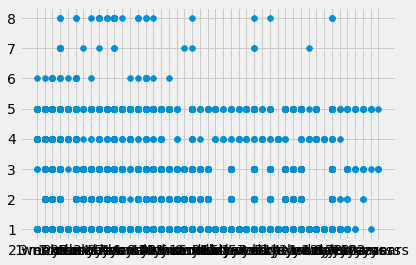

In [66]:
plt.scatter(cat_outcome_df['age_upon_outcome'], cat_outcome_df['outcome_type_num'])

In [241]:
def histogram(data, x_label, y_label, title):
    _, ax = plt.subplots()
    ax.hist(data, color = '#539caf')
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    
def bubblePlot(x_data, y_data, x_label, y_label, title):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = np.square(x_data) + 10, color = '#539caf', alpha = 0.75)

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

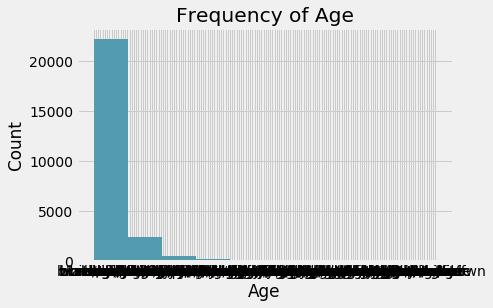

In [242]:
histogram(cat_outcome_df['color'].tolist(), 'Age', 'Count', 'Frequency of Age')

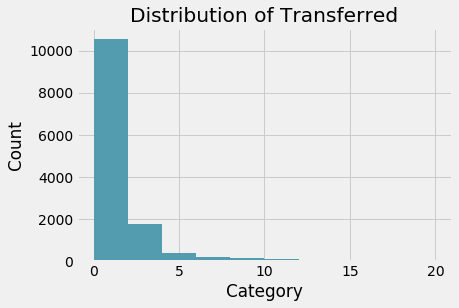

In [141]:
transferred_cats = cat_outcome_df.loc[cat_outcome_df['outcome_type_num'] == 1]
histogram(transferred_cats['outcome_age_(years)'].tolist(), 'Category', 'Count', 'Distribution of Transferred')

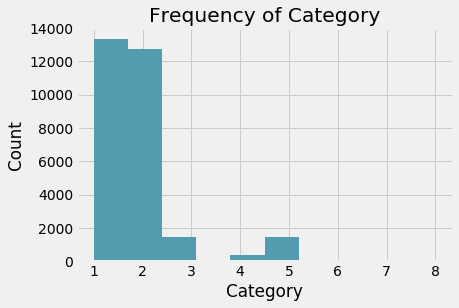

In [135]:
histogram(cat_outcome_df['outcome_type_num'].tolist(), 'Category', 'Count', 'Frequency of Category')

In [104]:
df = cat_outcome_df['outcome_type'].value_counts().rename_axis('unique_values').to_frame('counts')
df

,counts
unique_values,
Transfer,13323
Adoption,12732
Euthanasia,1452
Return to Owner,1431
Died,403
Rto-Adopt,33
Missing,28
Disposal,16


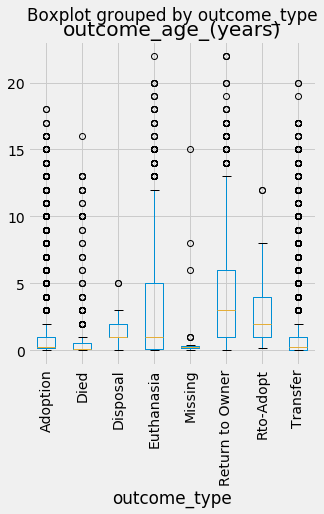

In [152]:
cat_outcome_df.boxplot('outcome_age_(years)','outcome_type',rot = 90,figsize=(5,6))

TypeError: unsupported operand type(s) for /: 'str' and 'int'

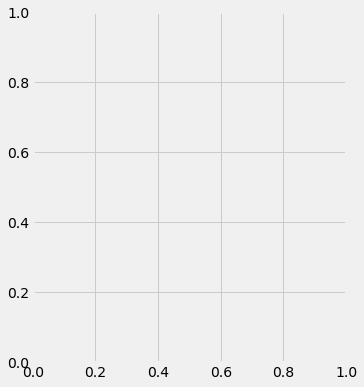

In [257]:
cat_outcome_df.boxplot('Cat/Kitten (outcome)','animal_type',rot = 90,figsize=(5,6))

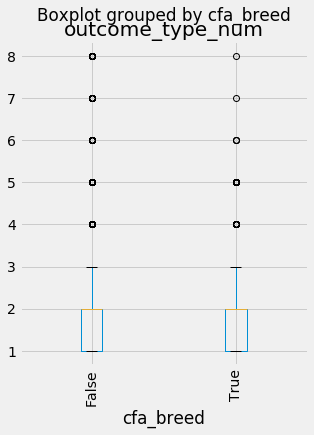

In [212]:
cat_outcome_df.boxplot('outcome_type_num','cfa_breed',rot = 90,figsize=(5,6))

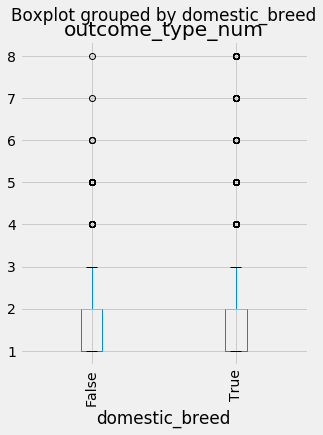

In [213]:
cat_outcome_df.boxplot('outcome_type_num','domestic_breed',rot = 90,figsize=(5,6))

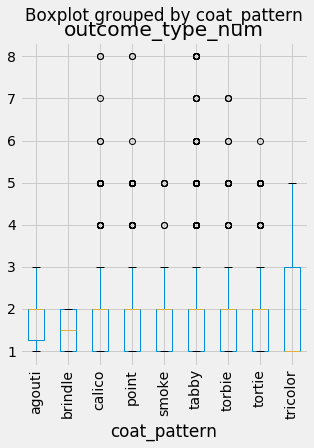

In [214]:
cat_outcome_df.boxplot('outcome_type_num','coat_pattern',rot = 90,figsize=(5,6))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


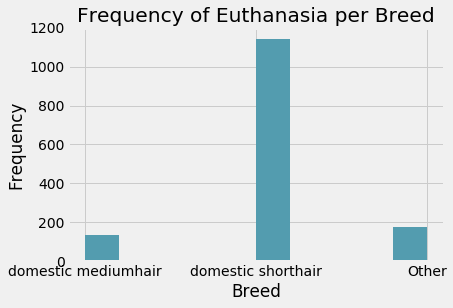

In [186]:
transferred_cats = cat_outcome_df.loc[cat_outcome_df['outcome_type_num'] == 5]
dfOfCount = transferred_cats['breed'].value_counts().to_dict()

def groupIfLessThanOneHundred(row):
    if dfOfCount[row['breed']] < 100 :
        return 'Other'
    return row['breed']

transferred_cats['grouped_breed'] = transferred_cats.apply (lambda row: groupIfLessThanOneHundred(row), axis=1)

histogram(transferred_cats['grouped_breed'].tolist(), 'Breed', 'Frequency', 'Frequency of Euthanasia per Breed')

In [234]:
# pd.get_dummies(cat_outcome_df[0], prefix=['outcome_type'])

# cat_outcome_df

In [ ]:
transferred_cats = cat_outcome_df.loc[cat_outcome_df['outcome_type_num'] == 5]
histogram(transferred_cats['outcome_age_(years)'].tolist(), 'Category', 'Age', 'Distribution of Euthanasia')

In [217]:
t = transferred_cats['color'].value_counts().to_dict()

In [231]:
dfOfCount = cat_outcome_df['color'].value_counts().to_dict()

def groupIfLessThanNinety(row):
    if dfOfCount[row['color']] < 1000 :
        return 'Other'
    return row['color']

cat_outcome_df['grouped_color'] = cat_outcome_df.apply (lambda row: groupIfLessThanNinety(row), axis=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


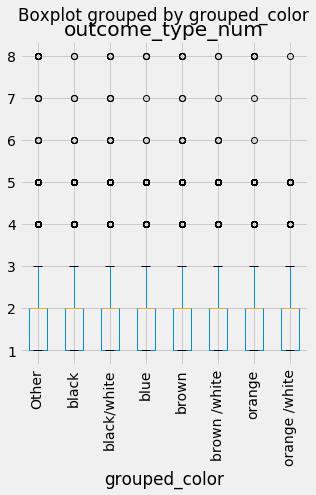

In [233]:
cat_outcome_df.boxplot('outcome_type_num','grouped_color',rot = 90,figsize=(5,6))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


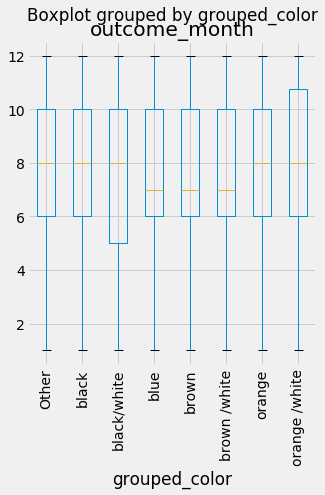

In [251]:
adopted_cats = cat_outcome_df.loc[cat_outcome_df['outcome_type_num'] == 2]
dfOfCount = adopted_cats['color'].value_counts().to_dict()

def groupIfLessThanOneHundred(row):
    if dfOfCount[row['color']] < 500 :
        return 'Other'
    return row['color']

adopted_cats['grouped_color'] = adopted_cats.apply (lambda row: groupIfLessThanOneHundred(row), axis=1)

adopted_cats.boxplot('outcome_month','grouped_color',rot = 90,figsize=(5,6))

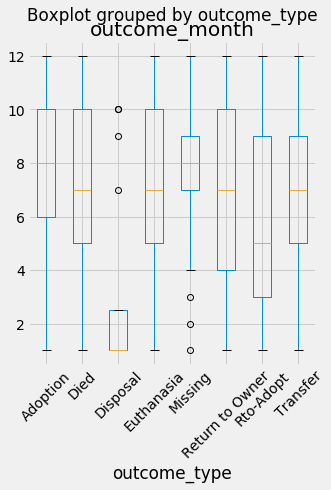

In [123]:
cat_outcome_df.boxplot('outcome_month','outcome_type',rot = 45,figsize=(5,6))

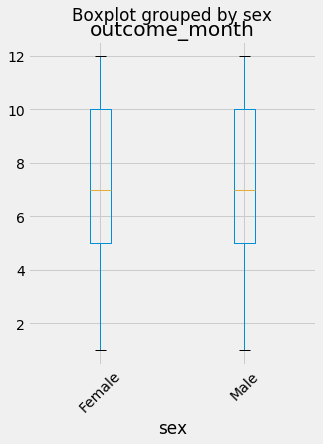

In [125]:
cat_outcome_df.boxplot('outcome_month','sex',rot = 45,figsize=(5,6))

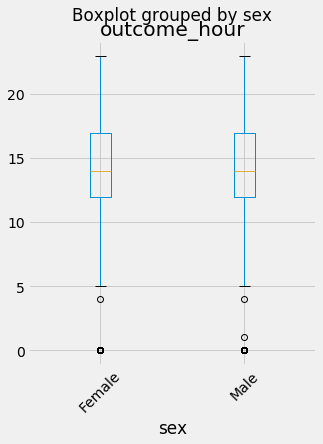

In [126]:
cat_outcome_df.boxplot('outcome_hour','sex',rot = 45,figsize=(5,6))

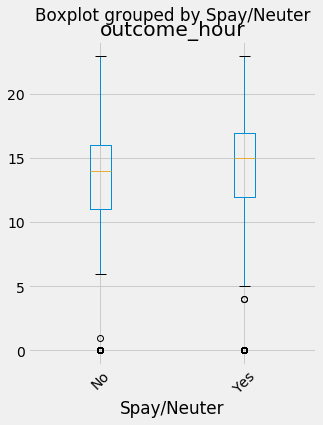

In [128]:
cat_outcome_df.boxplot('outcome_hour','Spay/Neuter',rot = 45,figsize=(5,6))

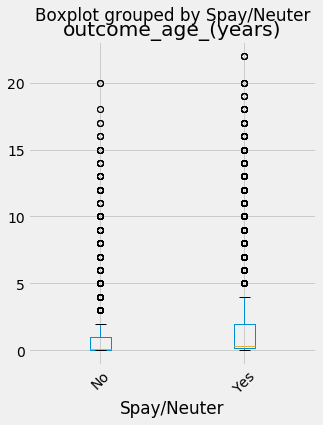

In [130]:
cat_outcome_df.boxplot('outcome_age_(years)','Spay/Neuter',rot = 45,figsize=(5,6))

### Add Budgeting

Estimated cost per annum is ~$875 (SOURCE: Animal Shelter Funding - RUcore - Rutgers University
https://rucore.libraries.rutgers.edu/rutgers-lib/38418/PDF/1/play/)

### Data Analysis

### age_upon_outcome 

In [6]:
cat_outcome_df.columns

Index(['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color',
       'date_of_birth', 'datetime', 'monthyear', 'name', 'outcome_subtype',
       'outcome_type', 'sex_upon_outcome', 'count', 'sex', 'Spay/Neuter',
       'Periods', 'Period Range', 'outcome_age_(days)', 'outcome_age_(years)',
       'Cat/Kitten (outcome)', 'sex_age_outcome', 'age_group', 'dob_year',
       'dob_month', 'dob_monthyear', 'outcome_month', 'outcome_year',
       'outcome_weekday', 'outcome_hour', 'breed1', 'breed2', 'cfa_breed',
       'domestic_breed', 'coat_pattern', 'color1', 'color2', 'coat'],
      dtype='object')

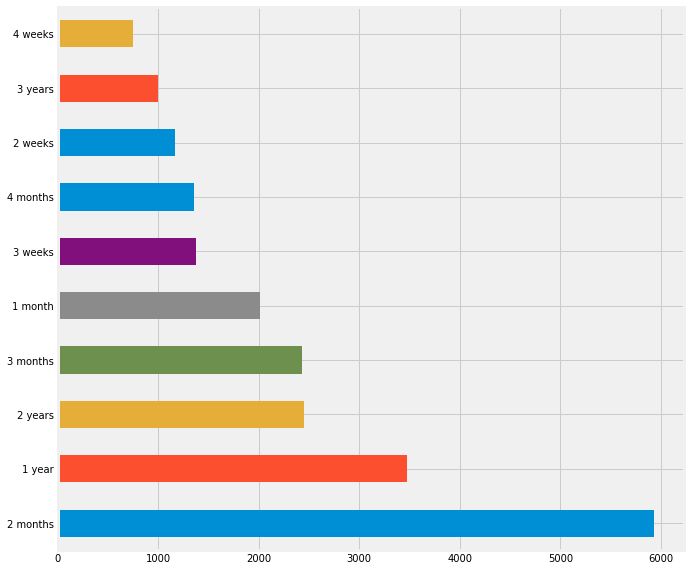

In [7]:
plt.figure(figsize=(10,10))
cat_outcome_df['age_upon_outcome'].value_counts()[:10].plot(kind='barh',)

### breed

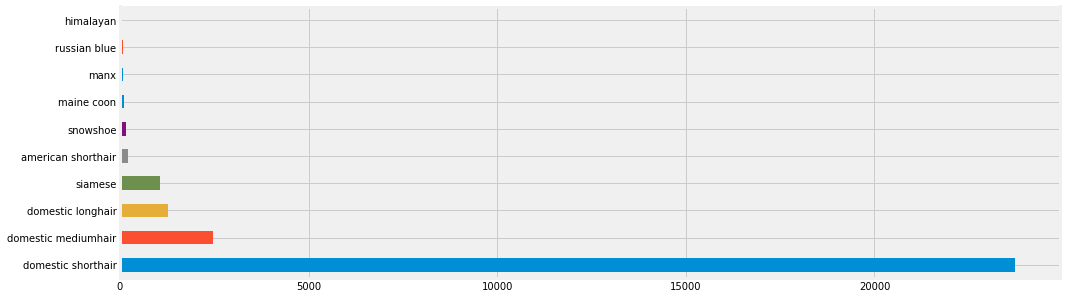

In [8]:
plt.figure(figsize=(15,5))
cat_outcome_df['breed'].value_counts()[:10].plot(kind='barh',)

### color

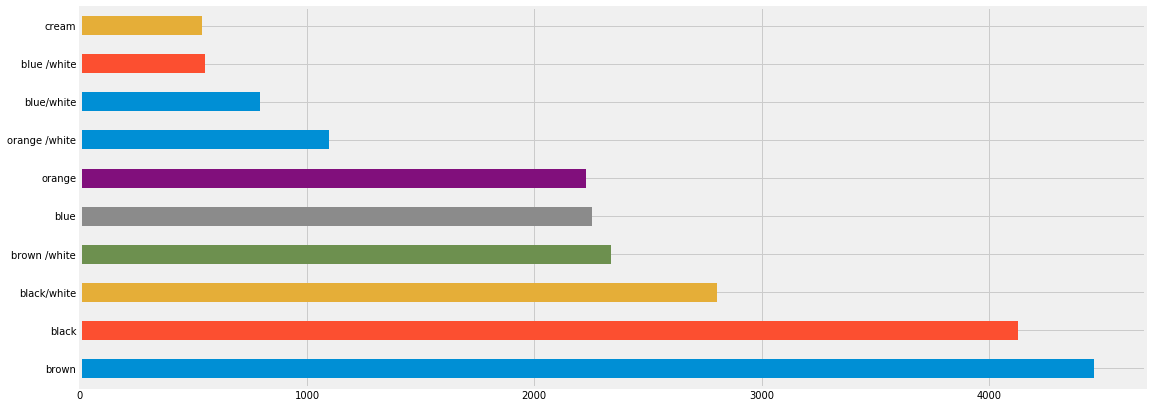

In [9]:
plt.figure(figsize=(17,7))
cat_outcome_df['color'].value_counts()[:10].plot(kind='barh',)

### outcome_type

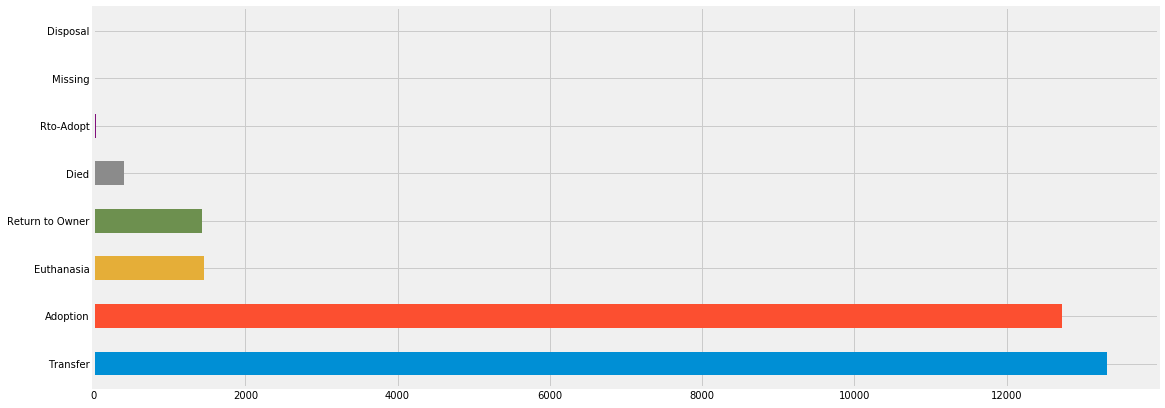

In [10]:
plt.figure(figsize=(17,7))
cat_outcome_df['outcome_type'].value_counts()[:].plot(kind='barh',)

### sex

Text(0.5, 1.0, 'Sex ')

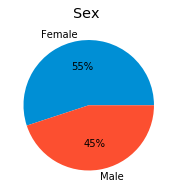

In [11]:
plt.figure(figsize=(3,3))
sex = cat_outcome_df['sex'].value_counts()
plt.pie(sex,labels= sex.index,autopct='%.0f%%')
centre_circle = plt.Circle((0,0),0,color='black', fc='white',linewidth=1.25)
plt.title('Sex ')


### Spay/Neuter

Text(0.5, 1.0, 'Spay/Neuter')

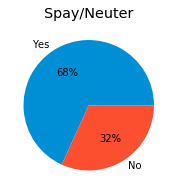

In [12]:
plt.figure(figsize=(3,3))
spay_neuter = cat_outcome_df['Spay/Neuter'].value_counts()
plt.pie(spay_neuter,labels= spay_neuter.index,autopct='%.0f%%')
centre_circle = plt.Circle((0,0),0,color='black', fc='white',linewidth=1.25)
plt.title('Spay/Neuter')


### outcome_weekday

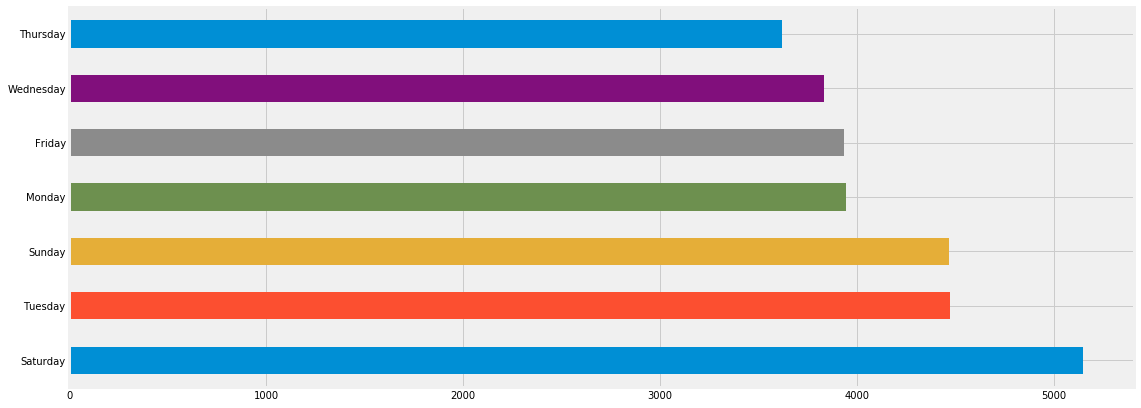

In [13]:
plt.figure(figsize=(17,7))
cat_outcome_df['outcome_weekday'].value_counts()[:7].plot(kind='barh',)

### outcome_hour

Text(0.5, 0, 'Day')

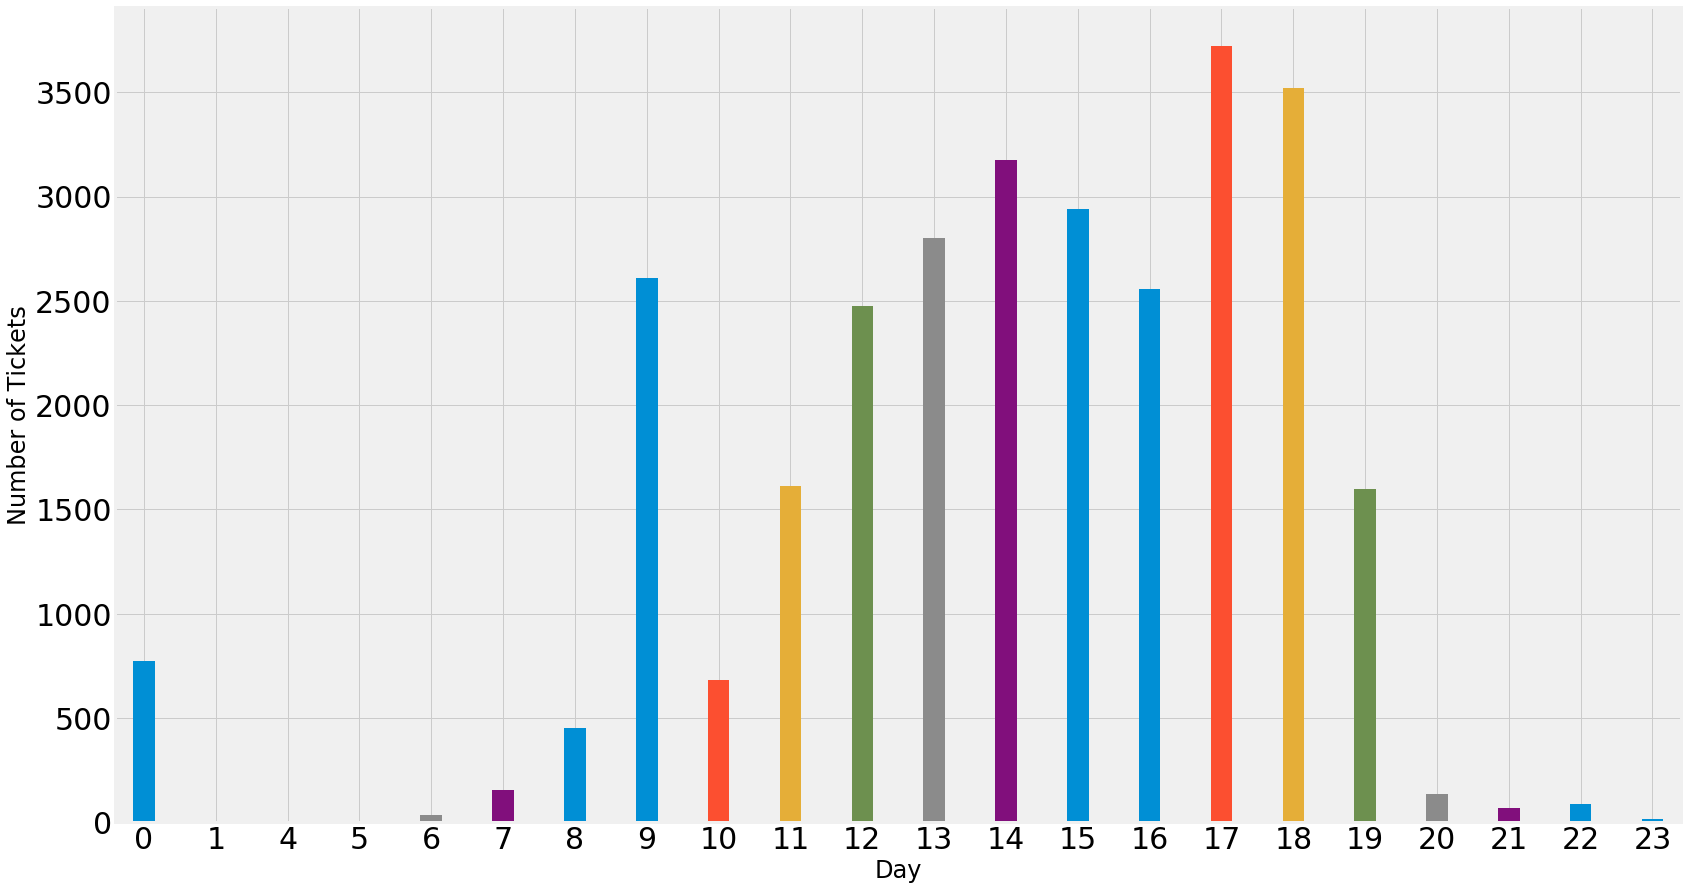

In [14]:
ax = cat_outcome_df.sort_values(by=['outcome_hour'])['outcome_hour'].value_counts(sort=False).sort_index().plot.bar(figsize=(25,15), fontsize=30, rot=0, width=0.3)
ax.set_ylabel('Number of Tickets', fontsize=24)
ax.set_xlabel('Day', fontsize=24)

### name

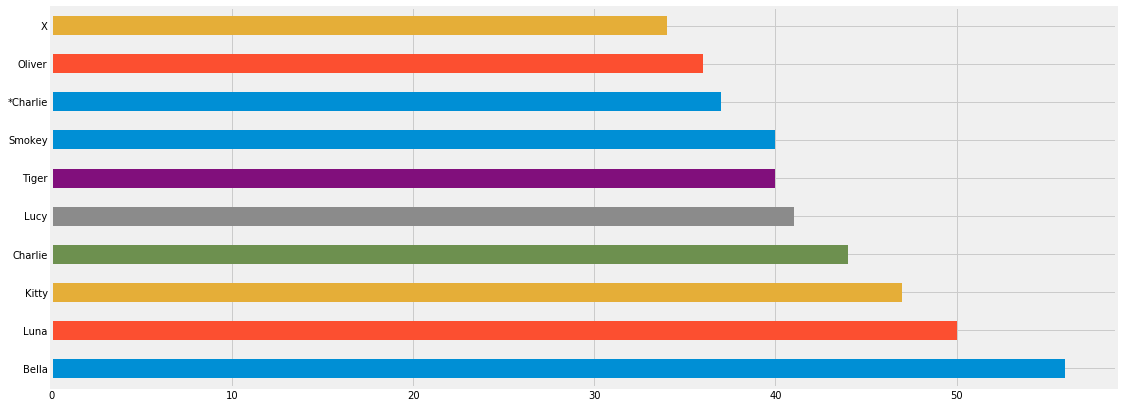

In [15]:
plt.figure(figsize=(17,7))
cat_outcome_df['name'].value_counts()[:10].plot(kind='barh',)

### outcome_year

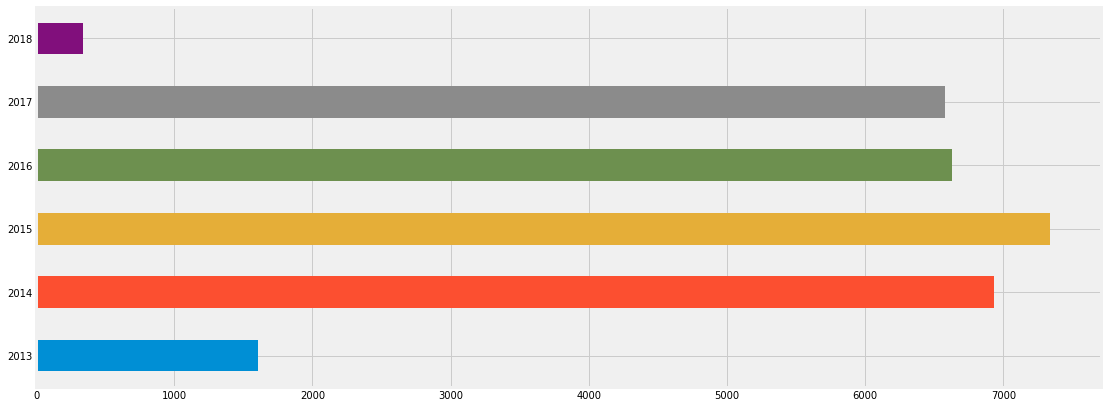

In [16]:
plt.figure(figsize=(17,7))
cat_outcome_df['outcome_year'] = cat_outcome_df['outcome_year'].astype(integer)
cat_outcome_df['outcome_year'].value_counts(sort=False).sort_index().plot(kind='barh',)

##  Poisson Distribution

### Adopted/Not Adopted

In [161]:
def set_not_adoption(outcome):
    if outcome != 'Adoption':
        return 'Not Adoption'
    return 'Adoption'
    
cat_outcome_df['adoption_binary'] = cat_outcome_df['outcome_type'].apply(set_not_adoption)

<Figure size 216x216 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1262cdb38>,
 [Text(-0.230667,1.07554,'Not Adoption'), Text(0.230667,-1.07554,'Adoption')],
 [Text(-0.125818,0.58666,'57%'), Text(0.125818,-0.58666,'43%')])

Text(0.5,1,'Adopted/Not Adopted')

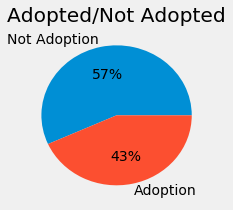

In [162]:
plt.figure(figsize=(3,3))
adoption_binary = cat_outcome_df['adoption_binary'].value_counts()
plt.pie(adoption_binary,labels= adoption_binary.index,autopct='%.0f%%')
centre_circle = plt.Circle((0,0),0,color='black', fc='white',linewidth=1.25)
plt.title('Adopted/Not Adopted')

Text(0,0.5,'Number of Tickets')

Text(0.5,0,'Category')

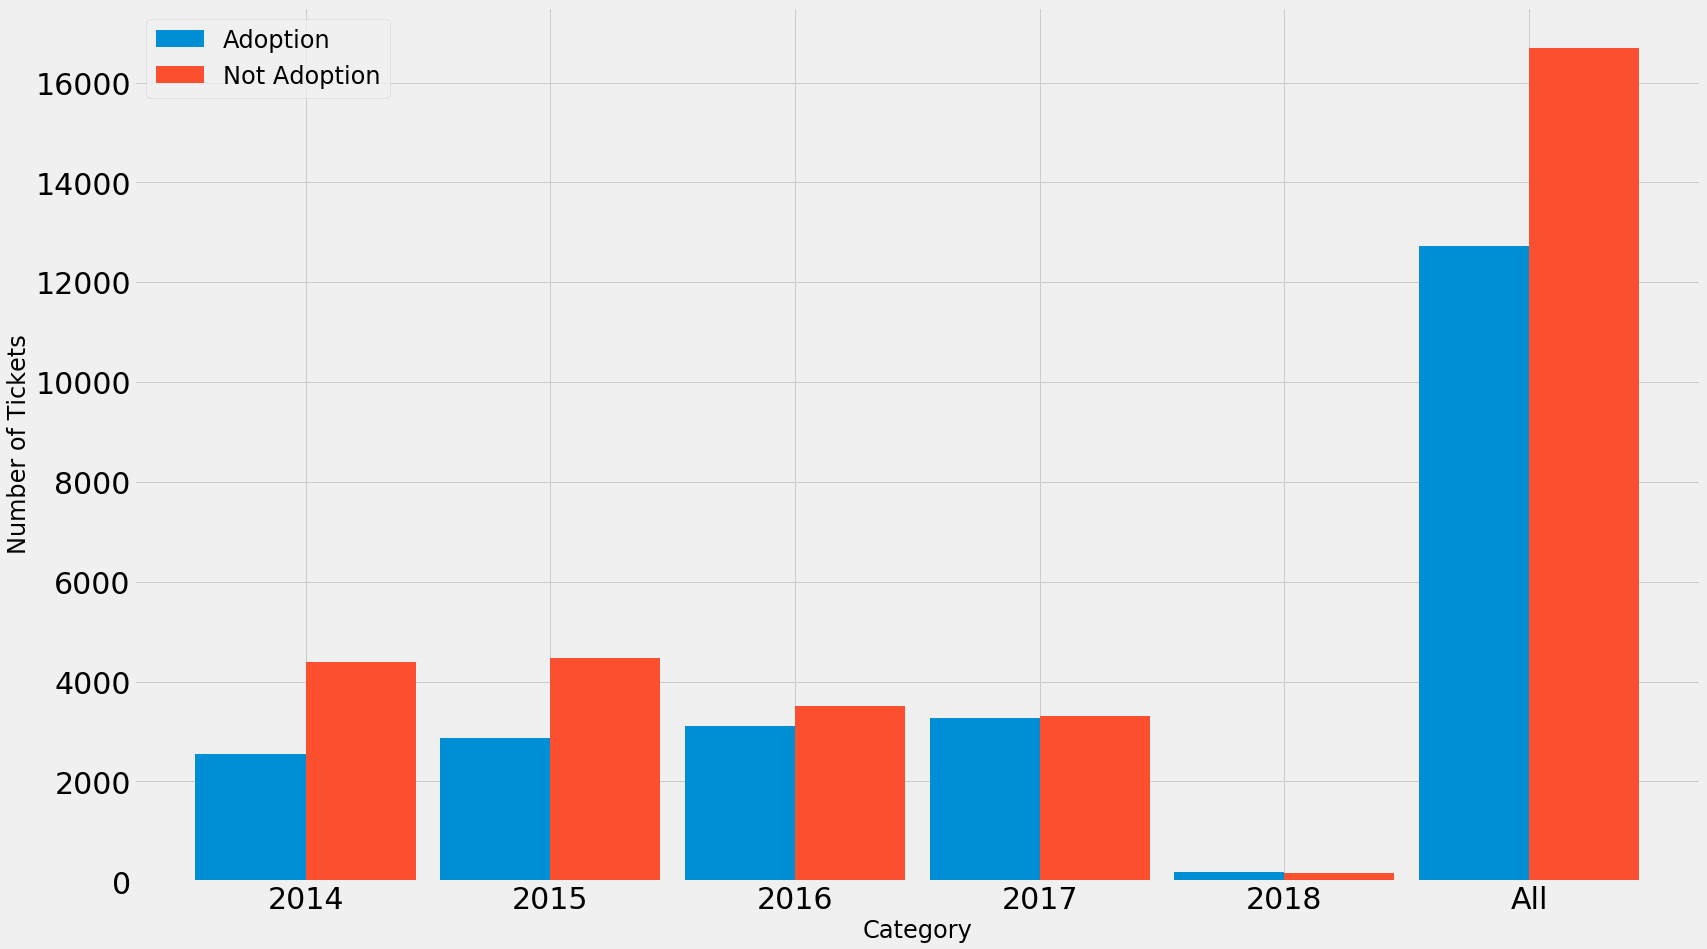

In [165]:
year_adoption_df = pd.crosstab(cat_outcome_df['outcome_year'],cat_outcome_df['adoption_binary'],margins=True)

ax = year_adoption_df.iloc[1:9, :-1].plot.bar(figsize=(25,15), fontsize=30, rot=0, width=0.9)
ax.set_ylabel('Number of Tickets', fontsize=24)
ax.set_xlabel('Category', fontsize=24)
ax.legend( prop={'size': 24})

In [186]:
year_adoption_df

adoption_binary,Adoption,Not Adoption,All
outcome_year,,,
2013,746,859,1605
2014,2548,4387,6935
2015,2873,4466,7339
2016,3111,3516,6627
2017,3273,3304,6577
2018,181,157,338
All,12732,16689,29421


In [226]:
import decimal
decimal.getcontext().prec = 100
_lambda =  decimal.Decimal(year_adoption_df.iloc[1:5, 0:1]['Adoption'].mean())
k =  decimal.Decimal(3111)

In [230]:
poisson_distribution =  (decimal.Decimal(math.e) ** k) *  (decimal.Decimal(math.e) ** (-_lambda)) /  decimal.Decimal(math.factorial(k))
poisson_distribution

Decimal('8.150618254834958740305828125209089458948317376571678641822665385850284778786453646241585859137129809E-9449')

In [238]:
logistic_rows = cat_outcome_df.loc[:, ['color', 'breed', 'Spay/Neuter', 'sex', 'adoption_binary' ]]
logistic_rows.head()

,color,breed,Spay/Neuter,sex,adoption_binary
0,orange,domestic shorthair,No,Male,Not Adoption
1,blue /white,domestic shorthair,No,Female,Adoption
2,white/black,domestic shorthair,Yes,Female,Adoption
3,black/white,domestic mediumhair,Yes,Female,Not Adoption
4,black/white,domestic shorthair,No,Male,Not Adoption


In [240]:
logistic_rows = pd.get_dummies(logistic_rows)
logistic_rows.head()

,color_/,color_/black,color_/blue,color_/blue cream,color_/brown,color_/gray,color_/lynx,color_/orange,color_/silver,color_/white,...,breed_sphynx,breed_tonkinese,breed_turkish angora,breed_turkish van,Spay/Neuter_No,Spay/Neuter_Yes,sex_Female,sex_Male,adoption_binary_Adoption,adoption_binary_Not Adoption
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [245]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(logistic_rows.drop('adoption_binary_Adoption',axis=1), 
                                                    logistic_rows['adoption_binary_Adoption'], test_size=0.30, 
                                                    random_state=101)

In [246]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [247]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      5030
          1       1.00      1.00      1.00      3797

avg / total       1.00      1.00      1.00      8827



In [256]:
import statsmodels.discrete.discrete_model as sm
logistic_rows
model = sm.Logit( logistic_rows['adoption_binary_Adoption'], 
               logistic_rows.drop('adoption_binary_Adoption',axis=1))
res = model.fit(maxiter=1000)
print(res.summary())


,color_/,color_/black,color_/blue,color_/blue cream,color_/brown,color_/gray,color_/lynx,color_/orange,color_/silver,color_/white,...,breed_sphynx,breed_tonkinese,breed_turkish angora,breed_turkish van,Spay/Neuter_No,Spay/Neuter_Yes,sex_Female,sex_Male,adoption_binary_Adoption,adoption_binary_Not Adoption
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


         Current function value: -0.000000
         Iterations: 1000


LinAlgError: Singular matrix